## Import relavent libraries

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import sys
import math

Display given image

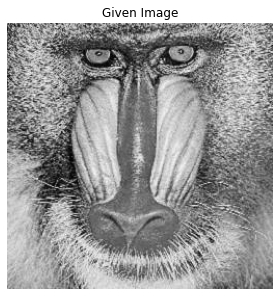

In [2]:
img = imageio.imread("Mandrill.png")
fig,ax = plt.subplots(figsize=(4,4), constrained_layout=True)
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(img, 'gray')
ax.title.set_text('Given Image')
plt.axis('off')
plt.show()

## Gaussian blurring
The following are the steps involved
1. Determine the blur kernal size to be $ \left \lceil{6 \sigma +1}\right \rceil $, ensuring that the same is odd.
2. We get the halfway length to be d, ie, $kernel size = 2d +1 $
3. A Gaussian blur kernel can be written as $(1/2\pi\sigma^2) \sum_{n} \sum_{m} e^{-(m^2+n^2)/2\sigma^2} $
4. Across the pixel locations we perform Gaussian blurring by multiplying the kernel and the pixel and its neighbours determined by the kernel size.
5. Along the borders we ensure Gaussian kernel is resized and normalised to do the blurring.
6. We observe this for varying sigma values

In [3]:
def Gaussian_blurring(sigma,img):
    
    # Get kernel size
    kernel_size = math.ceil(6*sigma+1)
    
    # We ensure that the kernel is odd sized
    if (kernel_size%2)==0 :
        kernel_size = kernel_size + 1
    d = (kernel_size)//2
    
    # If the kernel size is 1, the resultant blurring is none. The original image can be returned
    if kernel_size == 1:
        return img
    
    # Get blur kernel
    blur_kernel = np.zeros((kernel_size,kernel_size))
    for i in range(kernel_size):
        for j in range(kernel_size):
            blur_kernel[i, j] = np.exp((-(i-d)**2-(j-d)**2)/(2*(sigma**2)))
    blur_kernel = blur_kernel/np.sum(blur_kernel)
    
    # Perform blurring
    # Get image shape
    [x,y] = np.shape(img)
    
    # Create blur image
    blurred_image = np.zeros((x,y))
    for i in range(x):
        for j in range(y):
            
            # We ensure that the blur kernel is accordingly sized for pixels along the borders as well
            if i<d:
                i_start = 1
                i_end = i+d
                kernel_i_start = d-i+2
                kernel_i_end = 2*d+1
            elif i>x-d :
                i_start = i-d
                i_end = x
                kernel_i_start = 1
                kernel_i_end = x-i+d+1
            else :
                i_start = i-d
                i_end = i+d
                kernel_i_start = 1
                kernel_i_end = 2*d+1
            if j<d:
                j_start = 1
                j_end = j+d
                kernel_j_start = d-j+2
                kernel_j_end = 2*d+1
            elif j>y-d :
                j_start = j-d
                j_end = y
                kernel_j_start = 1
                kernel_j_end = y-j+d+1
            else :
                j_start = j-d
                j_end = j+d
                kernel_j_start = 1
                kernel_j_end = 2*d+1
            
            # Get the patch of image on which blurring is done
            patch = img[i_start:i_end, j_start:j_end]
            
            # Get the resized, normalised kernel for the patch
            kernel = blur_kernel[kernel_i_start:kernel_i_end,kernel_j_start:kernel_j_end]/np.sum(blur_kernel[kernel_i_start:kernel_i_end,kernel_j_start:kernel_j_end])
            
            # Blurred pixed value
            blurred_image[i, j] = np.sum(kernel*patch)
    
    # Return blurred image
    return blurred_image

## Gaussian Blurring for varying sigma values

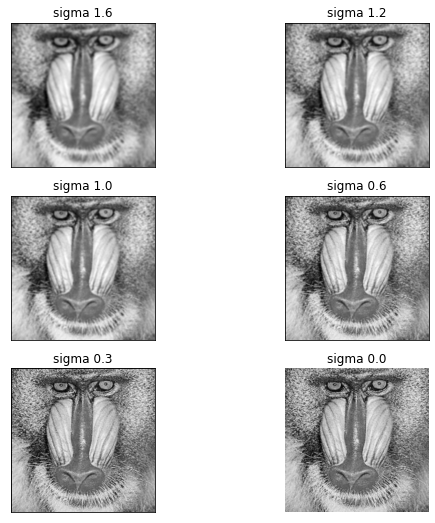

In [4]:
sigma = [1.6, 1.2, 1.0, 0.6, 0.3, 0.0]
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(9,9))
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax3.set_xticks([])
ax3.set_yticks([])
ax4.set_xticks([])
ax4.set_yticks([])
ax5.set_xticks([])
ax5.set_yticks([])
ax6.set_xticks([])
ax6.set_yticks([])

ax1.imshow(Gaussian_blurring(1.6,img), 'gray')
ax1.title.set_text('sigma 1.6')
ax2.imshow(Gaussian_blurring(1.2,img), 'gray')
ax2.title.set_text('sigma 1.2')
ax3.imshow(Gaussian_blurring(1.0,img), 'gray')
ax3.title.set_text('sigma 1.0')
ax4.imshow(Gaussian_blurring(0.6,img), 'gray')
ax4.title.set_text('sigma 0.6')
ax5.imshow(Gaussian_blurring(0.3,img), 'gray')
ax5.title.set_text('sigma 0.3')
ax6.imshow(Gaussian_blurring(0.0,img), 'gray')
ax6.title.set_text('sigma 0.0')

plt.axis('off')
plt.show()   

## Observations
1. Increasing the sigma value creates more blurring.
2. At $\sigma$ = 0 the image has no blurring.
3. At the boundary the blurring does not work very well.
4. Another approach would be to zero pad the image to accound for the kernel size and perform Gaussian blurring with the same kernel throughout. This would however create a vignette effect. This was therefore not done. 